# SKLearn XGBoost 훈련 및 추론

In [37]:
import pandas as pd

In [38]:
%store -r pre_train_file
%store -r pre_val_file
%store -r pre_test_file

In [39]:
train_df = pd.read_csv(pre_train_file, header=None, skiprows=1)
val_df = pd.read_csv(pre_val_file, header=None, skiprows=1)

In [40]:
from IPython.display import display
display(train_df.head())
display(val_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2,10396,2730,26,69.90,14.25,400.0,21.0,16.0,16.0,66,1476,151,14,319,21167,53046
1,1,10808,1381,26,359.90,14.42,15700.0,42.0,33.0,42.0,46,998,475,21,326,10329,54902
2,4,8243,2902,6,169.00,26.46,250.0,16.0,2.0,11.0,71,1247,475,21,55,22636,44761
3,1,3813,336,11,179.00,17.96,2841.0,40.0,23.0,26.0,50,1424,196,5,118,2309,25678
4,3,325,2699,26,115.98,20.00,600.0,19.0,17.0,18.0,50,1926,123,18,323,20664,2628


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,3,11313,2560,24,78.0,15.65,250.0,16.0,2.0,20.0,71,1247,475,21,295,19335,57212
1,2,10229,851,18,16.9,12.48,410.0,39.0,3.0,28.0,40,1656,11,14,216,6290,51673
2,4,6234,1301,5,49.3,22.28,250.0,20.0,8.0,11.0,3,710,475,21,40,9595,37568
3,1,4363,2357,11,22.0,15.23,225.0,21.0,11.0,16.0,27,1223,475,21,132,17637,28692
4,2,3755,336,11,179.9,24.25,5050.0,62.0,6.0,55.0,41,981,318,7,120,2364,25018


In [41]:
X_train, y_train = train_df.iloc[:,1:], train_df.iloc[:,0]
X_val, y_val = val_df.iloc[:,1:], val_df.iloc[:,0]

### XGBoost Parameters
- https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters

In [60]:
import xgboost as xgb

xgb_et = xgb.XGBClassifier(objective='multi:softmax',
                          colsample_bytree = 0.3,
                           max_depth = 5, alpha = 10, 
                           n_estimators = 200)
xgb_et.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
xgb_et.score(X_val, y_val)

0.4000744324525493

In [62]:
test_df = pd.read_csv(pre_test_file, header=None,skiprows=1)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,511,240,26,35.00,8.41,350.0,21.0,9.0,13.0,50,1148,475,21,326,1429,3682
1,3,8275,2914,17,21.99,22.85,300.0,17.0,4.0,12.0,69,1057,475,21,203,22830,44880
2,3,5185,2056,11,69.90,18.59,125.0,20.0,16.0,19.0,44,1337,207,21,132,15423,32883
3,2,9025,411,7,284.90,18.29,610.0,18.0,12.0,18.0,17,1608,117,14,65,3093,48009
4,2,321,2699,26,129.90,12.30,1700.0,30.0,35.0,25.0,70,153,99,21,326,20657,2534


In [63]:
X_test, y_test = test_df.iloc[:,1:], test_df.iloc[:,0]

In [64]:
prediction = xgb_et.predict(X_test)

## 평가

In [65]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.39%
f1_score: 0.34%


[[ 143  390   82   15    1]
 [ 139  670  594  113   11]
 [  53  368 1232  441   55]
 [  12  141  866  481   98]
 [   9   52  355  298   99]]


<Figure size 432x288 with 0 Axes>

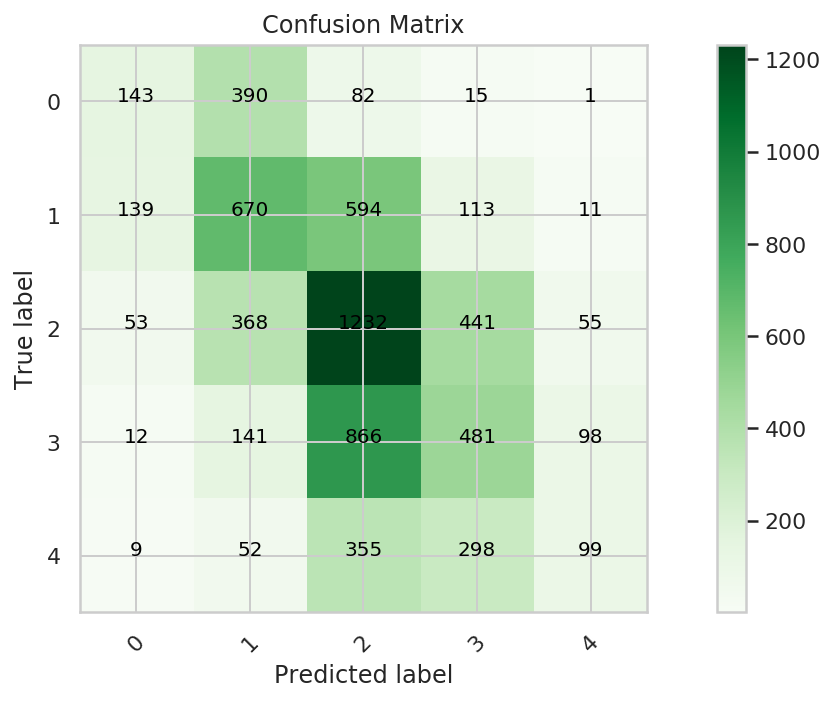

In [66]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

In [67]:
test_col_df = pd.read_csv(pre_test_file)
features = test_col_df.columns[1:]
features


Index(['customer_zip_code_prefix', 'customer_city', 'customer_state', 'price',
       'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_seller_state',
       'customer_seller_city', 'customer_seller_zip_code_prefix'],
      dtype='object')

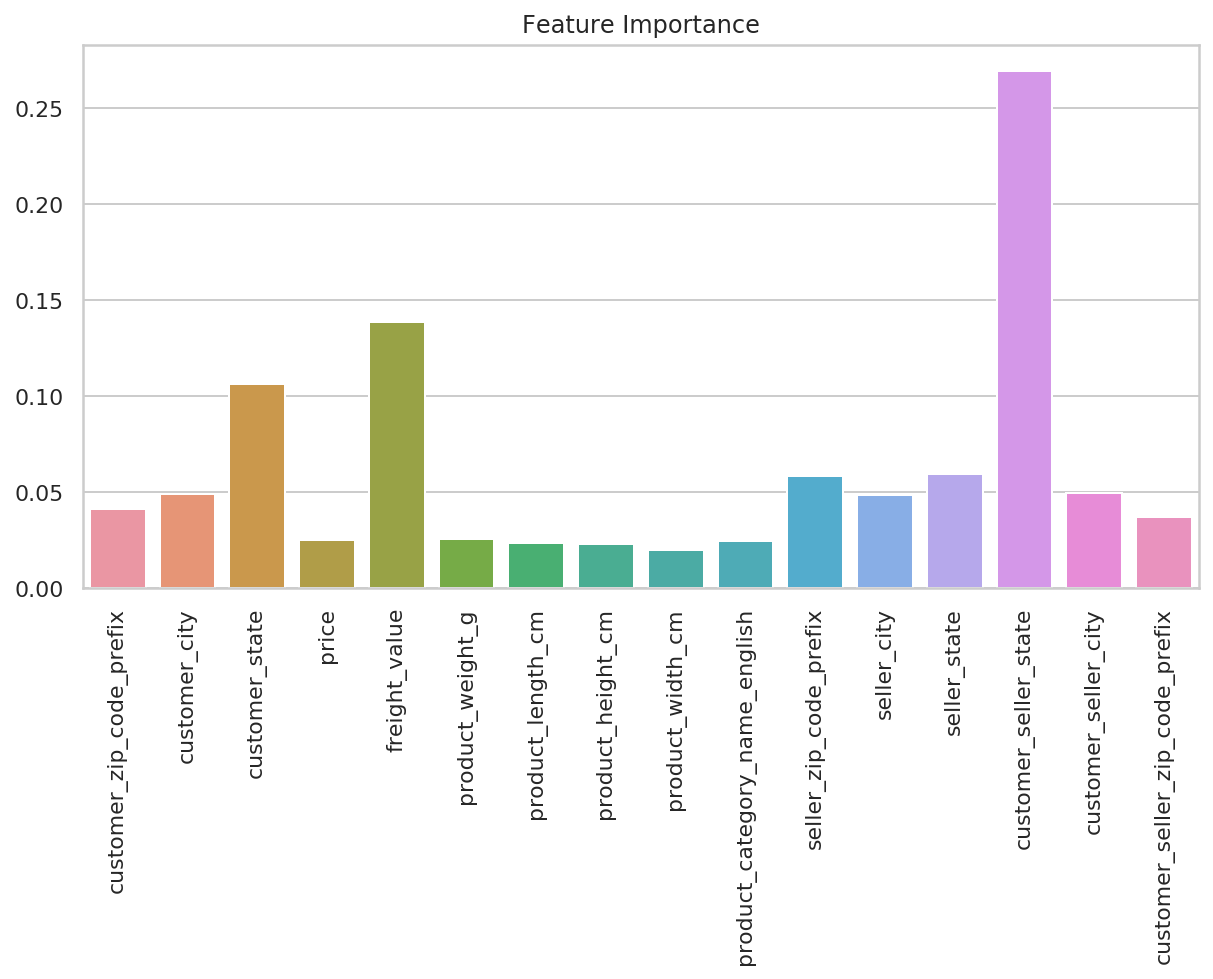

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


test_col_df = pd.read_csv(pre_test_file)
features = test_col_df.columns[1:]
fea_importance = xgb_et.feature_importances_

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()